Imports

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import pickle

Load Data

In [4]:
data = pd.read_csv("../data/all_data.csv")
display(data)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,...,DEP_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,FLIGHTS,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2022,8,1,1,8/1/2022 12:00:00 AM,9E,20363,9E,4628,15919,...,-2.0,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN
1,2022,8,1,1,8/1/2022 12:00:00 AM,9E,20363,9E,4630,13342,...,-6.0,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN
2,2022,8,1,1,8/1/2022 12:00:00 AM,9E,20363,9E,4631,14492,...,NaN,1.0,A,0.0,1.0,NaN,NaN,NaN,NaN,NaN
3,2022,8,1,1,8/1/2022 12:00:00 AM,9E,20363,9E,4632,11042,...,-5.0,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN
4,2022,8,1,1,8/1/2022 12:00:00 AM,9E,20363,9E,4634,10397,...,-6.0,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224495,2022,12,14,3,12/14/2022 12:00:00 AM,AA,19805,AA,2598,11503,...,-10.0,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN
5224496,2022,12,14,3,12/14/2022 12:00:00 AM,AA,19805,AA,2599,10800,...,-5.0,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN
5224497,2022,12,14,3,12/14/2022 12:00:00 AM,AA,19805,AA,2600,10721,...,-4.0,0.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN
5224498,2022,12,14,3,12/14/2022 12:00:00 AM,AA,19805,AA,2602,11298,...,176.0,0.0,NaN,0.0,1.0,59.0,0.0,18.0,0.0,117.0


In [5]:
# Airlines
airlines = pd.read_csv("../data/airlines.csv")
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
display(abbr_companies)

# Airports
airports = pd.read_csv("../data/airports.csv")
display(airports)
identify_airport = airports.set_index('IATA_CODE')['CITY'].to_dict()

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America',
 '9E': 'Endeavor Air',
 'G4': 'Allegiant Air',
 'OH': 'PSA Airlines',
 'QX': 'Horizon Air',
 'YV': 'Mesa Airlines',
 'YX': 'Republic Airways'}

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


Data Cleaning

In [6]:
data = data[['YEAR', 'MONTH', 'DAY_OF_MONTH', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'ORIGIN_CITY_NAME', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY']]
data = data.dropna()
display(data)

,YEAR,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY
0,2022,8,1,9E,4628,XNA,"Fayetteville, AR",1403,1401.0,-2.0
1,2022,8,1,9E,4630,MKE,"Milwaukee, WI",1100,1054.0,-6.0
3,2022,8,1,9E,4632,CLE,"Cleveland, OH",1713,1708.0,-5.0
4,2022,8,1,9E,4634,ATL,"Atlanta, GA",1817,1811.0,-6.0
5,2022,8,1,9E,4634,MOB,"Mobile, AL",1917,1905.0,-12.0
...,...,...,...,...,...,...,...,...,...,...
5224495,2022,12,14,AA,2598,EGE,"Eagle, CO",1040,1030.0,-10.0
5224496,2022,12,14,AA,2599,BUR,"Burbank, CA",700,655.0,-5.0
5224497,2022,12,14,AA,2600,BOS,"Boston, MA",830,826.0,-4.0
5224498,2022,12,14,AA,2602,DFW,"Dallas/Fort Worth, TX",1600,1856.0,176.0


In [7]:
data['CRS_DEP_HOUR'] = data['CRS_DEP_TIME'].apply(lambda x: '00' if str(int(float(x)))[:-2] == '' else str(int(float(x)))[:-2])
data['CRS_DEP_MIN'] = data['CRS_DEP_TIME'].apply(lambda x: '00' if str(int(float(x)))[-2:] == '' else str(int(float(x)))[-2:])
data['CRS_DEP_TIME'] = pd.to_datetime(data['CRS_DEP_HOUR'] + ':' + data['CRS_DEP_MIN'], format='%H:%M')
data['CRS_DEP_TIME'] = data['CRS_DEP_TIME'].dt.time
display(data)

,YEAR,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_DEP_HOUR,CRS_DEP_MIN
0,2022,8,1,9E,4628,XNA,"Fayetteville, AR",14:03:00,1401.0,-2.0,14,03
1,2022,8,1,9E,4630,MKE,"Milwaukee, WI",11:00:00,1054.0,-6.0,11,00
3,2022,8,1,9E,4632,CLE,"Cleveland, OH",17:13:00,1708.0,-5.0,17,13
4,2022,8,1,9E,4634,ATL,"Atlanta, GA",18:17:00,1811.0,-6.0,18,17
5,2022,8,1,9E,4634,MOB,"Mobile, AL",19:17:00,1905.0,-12.0,19,17
...,...,...,...,...,...,...,...,...,...,...,...,...
5224495,2022,12,14,AA,2598,EGE,"Eagle, CO",10:40:00,1030.0,-10.0,10,40
5224496,2022,12,14,AA,2599,BUR,"Burbank, CA",07:00:00,655.0,-5.0,7,00
5224497,2022,12,14,AA,2600,BOS,"Boston, MA",08:30:00,826.0,-4.0,8,30
5224498,2022,12,14,AA,2602,DFW,"Dallas/Fort Worth, TX",16:00:00,1856.0,176.0,16,00


In [8]:
data[['CRS_DEP_HOUR', 'CRS_DEP_MIN']] = data[['CRS_DEP_HOUR', 'CRS_DEP_MIN']].astype(int)
data['CRS_DEP_TOTAL_SEC'] = data['CRS_DEP_HOUR']*3600 + data['CRS_DEP_MIN']*60
display(data)

,YEAR,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_DEP_HOUR,CRS_DEP_MIN,CRS_DEP_TOTAL_SEC
0,2022,8,1,9E,4628,XNA,"Fayetteville, AR",14:03:00,1401.0,-2.0,14,3,50580
1,2022,8,1,9E,4630,MKE,"Milwaukee, WI",11:00:00,1054.0,-6.0,11,0,39600
3,2022,8,1,9E,4632,CLE,"Cleveland, OH",17:13:00,1708.0,-5.0,17,13,61980
4,2022,8,1,9E,4634,ATL,"Atlanta, GA",18:17:00,1811.0,-6.0,18,17,65820
5,2022,8,1,9E,4634,MOB,"Mobile, AL",19:17:00,1905.0,-12.0,19,17,69420
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224495,2022,12,14,AA,2598,EGE,"Eagle, CO",10:40:00,1030.0,-10.0,10,40,38400
5224496,2022,12,14,AA,2599,BUR,"Burbank, CA",07:00:00,655.0,-5.0,7,0,25200
5224497,2022,12,14,AA,2600,BOS,"Boston, MA",08:30:00,826.0,-4.0,8,30,30600
5224498,2022,12,14,AA,2602,DFW,"Dallas/Fort Worth, TX",16:00:00,1856.0,176.0,16,0,57600


Training and testing data

In [9]:
data_train = data.loc[data['DAY_OF_MONTH'] < 24].reset_index(drop=True)
display(data_train)
data_test  = data.loc[data['DAY_OF_MONTH'] >= 24].reset_index(drop=True)
display(data_test)

,YEAR,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_DEP_HOUR,CRS_DEP_MIN,CRS_DEP_TOTAL_SEC
0,2022,8,1,9E,4628,XNA,"Fayetteville, AR",14:03:00,1401.0,-2.0,14,3,50580
1,2022,8,1,9E,4630,MKE,"Milwaukee, WI",11:00:00,1054.0,-6.0,11,0,39600
2,2022,8,1,9E,4632,CLE,"Cleveland, OH",17:13:00,1708.0,-5.0,17,13,61980
3,2022,8,1,9E,4634,ATL,"Atlanta, GA",18:17:00,1811.0,-6.0,18,17,65820
4,2022,8,1,9E,4634,MOB,"Mobile, AL",19:17:00,1905.0,-12.0,19,17,69420
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971090,2022,12,14,AA,2598,EGE,"Eagle, CO",10:40:00,1030.0,-10.0,10,40,38400
3971091,2022,12,14,AA,2599,BUR,"Burbank, CA",07:00:00,655.0,-5.0,7,0,25200
3971092,2022,12,14,AA,2600,BOS,"Boston, MA",08:30:00,826.0,-4.0,8,30,30600
3971093,2022,12,14,AA,2602,DFW,"Dallas/Fort Worth, TX",16:00:00,1856.0,176.0,16,0,57600


,YEAR,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_DEP_HOUR,CRS_DEP_MIN,CRS_DEP_TOTAL_SEC
0,2022,8,24,9E,4628,XNA,"Fayetteville, AR",14:03:00,1401.0,-2.0,14,3,50580
1,2022,8,24,9E,4631,RDU,"Raleigh/Durham, NC",15:59:00,1554.0,-5.0,15,59,57540
2,2022,8,24,9E,4632,CLE,"Cleveland, OH",16:15:00,1611.0,-4.0,16,15,58500
3,2022,8,24,9E,4634,ATL,"Atlanta, GA",18:07:00,1801.0,-6.0,18,7,65220
4,2022,8,24,9E,4634,MOB,"Mobile, AL",19:07:00,1901.0,-6.0,19,7,68820
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150546,2023,4,30,YX,5855,BWI,"Baltimore, MD",12:15:00,1243.0,28.0,12,15,44100
1150547,2023,4,30,YX,5856,DCA,"Washington, DC",11:55:00,1222.0,27.0,11,55,42900
1150548,2023,4,30,YX,5857,RIC,"Richmond, VA",08:45:00,937.0,52.0,8,45,31500
1150549,2023,4,30,YX,5858,BOS,"Boston, MA",12:20:00,1211.0,-9.0,12,20,44400


Training

Get Flight Delays

In [10]:
# function that extract statistical parameters from a grouby object:
def get_stats(group):
    return {'MIN': group.min(), 'MAX': group.max(),
            'COUNT': group.count(), 'MEAN': group.mean()}

def get_flight_delays(data, input_airline, input_airport, extrem_values=False):
    df2 = data[(data['OP_UNIQUE_CARRIER'] == input_airline) & (data['ORIGIN'] == input_airport)]

    # remove extreme values before fitting
    if extrem_values: df2 = df2.loc[df2['DEP_DELAY'] < 60].reset_index(drop=True)
    
    # grouping of flights by departure time and calculation of the average
    test2 = df2['DEP_DELAY'].groupby(df2['CRS_DEP_HOUR']).apply(get_stats).unstack()
    test2.reset_index(inplace=True)
    
    return test2

def get_merged_delays(data, input_airline):
    list_airports = data.loc[data['OP_UNIQUE_CARRIER'] == input_airline, 'ORIGIN'].unique()
    display(list_airports)
    i = 0
    list_columns = ['ORIGIN', 'CRS_DEP_HOUR', 'MEAN']
    for id_airport in list_airports:
        test2 = get_flight_delays(data, input_airline, id_airport, True)
        test2.loc[:, 'ORIGIN'] = id_airport
        test2 = test2[list_columns]
        test2.dropna(how = 'any', inplace=True)
        if i == 0: merged_df = test2.copy()
        else: merged_df = pd.concat([merged_df, test2], ignore_index=True)
        i += 1
    return merged_df


Building Regression

In [11]:
input_airline = 'AA'
merged_df = get_merged_delays(data_train, input_airline)
display(merged_df)
display(merged_df.shape)

array(['JFK', 'LAX', 'DCA', 'ORD', 'STL', 'BOS', 'AUS', 'DEN', 'DFW',
       'MIA', 'RSW', 'LAS', 'SJC', 'HNL', 'DTW', 'BUF', 'FAT', 'ATL',
       'TUS', 'CLT', 'EWR', 'MSY', 'TUL', 'PHL', 'VPS', 'IND', 'SAN',
       'LGA', 'JAX', 'MCO', 'PHX', 'RDU', 'BDL', 'MCI', 'BNA', 'TPA',
       'RIC', 'BGR', 'SYR', 'FCA', 'OGG', 'BHM', 'BWI', 'JAC', 'STT',
       'MKE', 'SFO', 'BZN', 'BUR', 'CHS', 'SLC', 'PBI', 'IAH', 'SAT',
       'SJU', 'SEA', 'DSM', 'AVP', 'PVD', 'SMF', 'CLE', 'CMH', 'STX',
       'PIT', 'SNA', 'MEM', 'RNO', 'ELP', 'BOI', 'FLL', 'MSP', 'PDX',
       'ONT', 'ABQ', 'GEG', 'GRR', 'ORF', 'EUG', 'MSN', 'CVG', 'SBA',
       'ICT', 'GSP', 'MFE', 'MDT', 'EYW', 'MHT', 'SRQ', 'ILM', 'OKC',
       'IAD', 'ANC', 'PNS', 'RAP', 'LIT', 'SDF', 'COS', 'OMA', 'EGE',
       'ROC', 'PWM', 'MYR', 'MTJ', 'BTV', 'XNA', 'SAV', 'PSP', 'KOA',
       'AVL', 'LIH', 'MSO', 'ALB', 'GSO', 'ECP', 'TYS', 'AMA', 'GRB',
       'GUC', 'HDN', 'DAB', 'SBP', 'BFL', 'FSD', 'MRY', 'CAE', 'HSV',
       'CID', 'LBB',

,ORIGIN,CRS_DEP_HOUR,MEAN
0,JFK,5,1.312500
1,JFK,6,-1.638989
2,JFK,7,-0.008208
3,JFK,8,0.084489
4,JFK,9,-0.660171
...,...,...,...
1534,AGS,16,5.600000
1535,AGS,18,55.000000
1536,AGS,19,9.000000
1537,LEX,6,0.352941


(1539, 3)

In [23]:
# Merge v2 ~ AGGREGATE
data_train = data_train.loc[abs(data_train['DEP_DELAY']) < 60].reset_index(drop=True)
agg_data = data_train.groupby(['OP_UNIQUE_CARRIER', 'ORIGIN', 'CRS_DEP_HOUR'], as_index=False).agg({'DEP_DELAY': 'mean'})
# merged_df = agg_data.loc[(agg_data['OP_UNIQUE_CARRIER'] == 'AA')]
merged_df = agg_data.rename(columns={'DEP_DELAY': 'MEAN'})

merged_df.to_csv('../data/delay_agg.csv', index=False)
display(merged_df)

,OP_UNIQUE_CARRIER,ORIGIN,CRS_DEP_HOUR,MEAN
0,9E,ABE,5,-1.745763
1,9E,ABE,6,-3.504950
2,9E,ABE,7,-4.750000
3,9E,ABE,9,10.333333
4,9E,ABE,10,-8.000000
...,...,...,...,...
20309,YX,XNA,10,-9.000000
20310,YX,XNA,11,-3.741935
20311,YX,XNA,12,-5.345455
20312,YX,XNA,13,2.621212


In [24]:
merged_df = merged_df.loc[merged_df['OP_UNIQUE_CARRIER'] == input_airline]
display(merged_df)

,OP_UNIQUE_CARRIER,ORIGIN,CRS_DEP_HOUR,MEAN
1116,AA,ABQ,5,-1.375000
1117,AA,ABQ,6,-3.090164
1118,AA,ABQ,7,-3.454545
1119,AA,ABQ,8,-3.775862
1120,AA,ABQ,9,-4.320000
...,...,...,...,...
2650,AA,XNA,12,4.314286
2651,AA,XNA,13,0.271186
2652,AA,XNA,14,-0.235294
2653,AA,XNA,16,10.500000


In [25]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(merged_df['ORIGIN'])

# correspondance between the codes and tags of the airports
zipped = zip(integer_encoded, merged_df['ORIGIN'])
label_airports = list(set(list(zipped)))
label_airports.sort(key = lambda x:x[0])
display(label_airports[:5])

[(0, 'ABQ'), (1, 'AGS'), (2, 'ALB'), (3, 'AMA'), (4, 'ANC')]

In [26]:
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
display(onehot_encoded)

b = np.array(merged_df['CRS_DEP_HOUR'])
b = b.reshape(len(b),1)
X = np.hstack((onehot_encoded, b))
display(X)
Y = np.array(merged_df['MEAN'])
display(Y)
Y = Y.reshape(len(Y), 1)
display(Y)
display(X.shape, Y.shape)

/Users/sallysun/Documents/unsw/random_code/hackathons/will-i-make-my-flight/backend/models/.venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

array([[ 1.,  0.,  0., ...,  0.,  0.,  5.],
       [ 1.,  0.,  0., ...,  0.,  0.,  6.],
       [ 1.,  0.,  0., ...,  0.,  0.,  7.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  1., 14.],
       [ 0.,  0.,  0., ...,  0.,  1., 16.],
       [ 0.,  0.,  0., ...,  0.,  1., 18.]])

array([-1.375     , -3.09016393, -3.45454545, ..., -0.23529412,
       10.5       ,  2.80645161])

array([[-1.375     ],
       [-3.09016393],
       [-3.45454545],
       ...,
       [-0.23529412],
       [10.5       ],
       [ 2.80645161]])

(1539, 131)

(1539, 1)

Linear Regression

In [27]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
predictions = lm.predict(X)
# display(predictions[1538])
display("MSE =", metrics.mean_squared_error(predictions, Y))

'MSE ='

20.716375830874842

In [41]:
# number of predictions where the differences with real values is less than 1 hr
icount = 0
for i, val in enumerate(Y):
    if abs(val-predictions[i]) > 15: icount += 1
'{:.2f}%'.format(icount / len(predictions) * 100)

'0.97%'

Polynomial Regression

In [34]:
poly = PolynomialFeatures(degree = 2)
regr = linear_model.LinearRegression()
X_ = poly.fit_transform(X)
regr.fit(X_, Y)

# # save the model to disk
# filename = '../api/models/flight_delay_model.sav'
# pickle.dump(regr, open(filename, 'wb'))

result = regr.predict(X_)
display("MSE =", metrics.mean_squared_error(result, Y))
display(result)

# number of predictions where the differences with real values is greater than 15 minutes
icount = 0
for i, val in enumerate(Y):
    if abs(val-result[i]) > 15: icount += 1
'{:.2f}%'.format(icount / len(result) * 100)

'MSE ='

17.12022923883682

array([[-3.44995117],
       [-2.65014648],
       [-1.89526367],
       ...,
       [ 2.84954834],
       [ 3.87591553],
       [ 4.72259521]])

'1.04%'

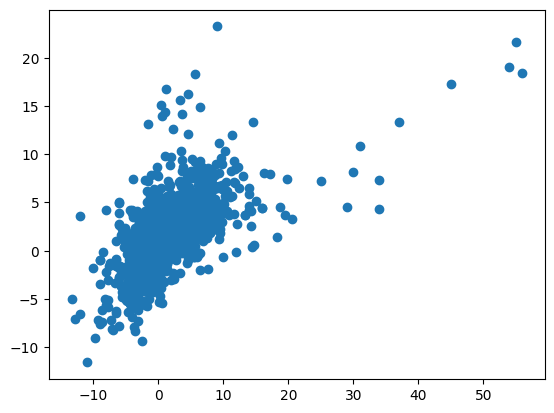

In [ ]:
sns.jointplot(x="original_data", y="prediction", data=tips, size = 6, ratio = 7,
              joint_kws={'line_kws':{'color':'limegreen'}}, kind='reg')
plt.xlabel('Mean delays (min)', fontsize = 15)
plt.ylabel('Predictions (min)', fontsize = 15)
plt.scatter(merged_df['MEAN'], result)

Try Normalisation

In [36]:
# Find Overall
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

ridgereg = Ridge(alpha=0.3)
poly = PolynomialFeatures(degree = 2)
X_ = poly.fit_transform(X_train)
ridgereg.fit(X_, Y_train)

X_ = poly.fit_transform(X_test)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y_test)
print("Mean squared error = ", score)

# Find for different polynomial degrees
score_min = 10000
for pol_order in range(1, 3):
    for alpha in range(0, 20, 2):
        ridgereg = Ridge(alpha = alpha/10)
        poly = PolynomialFeatures(degree = pol_order)
        regr = linear_model.LinearRegression()
        X_ = poly.fit_transform(X_train)
        ridgereg.fit(X_, Y_train)        
        X_ = poly.fit_transform(X_test)
        result = ridgereg.predict(X_)
        score = metrics.mean_squared_error(result, Y_test)        
        if score < score_min:
            score_min = score
            parameters = [alpha/10, pol_order]
        print("n={} alpha={} , MSE = {:<0.5}".format(pol_order, alpha, score))
        
# Find for best
ridgereg = Ridge(alpha = parameters[0])
poly = PolynomialFeatures(degree = parameters[1])
X_ = poly.fit_transform(X)
ridgereg.fit(X_, Y)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y)        
print("Mean squared error = ", score)

Mean squared error =  27.088197682165713
n=1 alpha=0 , MSE = 26.322
n=1 alpha=2 , MSE = 26.169
n=1 alpha=4 , MSE = 25.979
n=1 alpha=6 , MSE = 25.813
n=1 alpha=8 , MSE = 25.668
n=1 alpha=10 , MSE = 25.539
n=1 alpha=12 , MSE = 25.424
n=1 alpha=14 , MSE = 25.321
n=1 alpha=16 , MSE = 25.228
n=1 alpha=18 , MSE = 25.143


/Users/sallysun/Documents/unsw/random_code/hackathons/will-i-make-my-flight/backend/models/.venv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


n=2 alpha=0 , MSE = 64.056
n=2 alpha=2 , MSE = 27.5
n=2 alpha=4 , MSE = 26.899
n=2 alpha=6 , MSE = 26.731
n=2 alpha=8 , MSE = 26.664
n=2 alpha=10 , MSE = 26.634
n=2 alpha=12 , MSE = 26.622
n=2 alpha=14 , MSE = 26.618
n=2 alpha=16 , MSE = 26.618
n=2 alpha=18 , MSE = 26.621
Mean squared error =  20.708815570125054


Testing

In [37]:
input_airline = 'AA'
merged_df_test = get_merged_delays(data_test, input_airline)
display(data_test)

array(['JFK', 'LAX', 'DCA', 'ORD', 'BOS', 'AUS', 'DEN', 'DFW', 'MSN',
       'PVD', 'LAS', 'SJC', 'HNL', 'DTW', 'BUF', 'FAT', 'MIA', 'CLT',
       'TUS', 'EWR', 'TUL', 'PHL', 'VPS', 'ATL', 'IND', 'PWM', 'SAN',
       'LGA', 'JAX', 'MCO', 'MSP', 'PHX', 'RDU', 'MYR', 'RSW', 'BDL',
       'MCI', 'BNA', 'TPA', 'RIC', 'SYR', 'FCA', 'SAV', 'OGG', 'BHM',
       'BWI', 'CHS', 'JAC', 'SAT', 'MKE', 'SFO', 'BZN', 'BUR', 'SLC',
       'PIT', 'PBI', 'IAH', 'STL', 'SEA', 'DSM', 'AVP', 'MSY', 'CLE',
       'PNS', 'CMH', 'STX', 'PSP', 'SNA', 'MEM', 'SJU', 'RNO', 'BOI',
       'FLL', 'STT', 'PDX', 'ONT', 'ABQ', 'GEG', 'GRR', 'ORF', 'CVG',
       'SBA', 'ICT', 'EYW', 'GSO', 'ELP', 'MSO', 'SDF', 'MFE', 'MHT',
       'ILM', 'IAD', 'ANC', 'RAP', 'LIT', 'OKC', 'COS', 'OMA', 'EGE',
       'TYS', 'ROC', 'MTJ', 'SMF', 'BTV', 'XNA', 'SRQ', 'LIH', 'EUG',
       'BGR', 'AMA', 'AVL', 'ALB', 'KOA', 'MDT', 'ECP', 'GSP', 'GRB',
       'GUC', 'HDN', 'SBP', 'CID', 'DAB', 'LBB', 'BFL', 'FSD', 'HSV',
       'MRY', 'CAE',

,YEAR,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_DEP_HOUR,CRS_DEP_MIN,CRS_DEP_TOTAL_SEC
0,2022,8,24,9E,4628,XNA,"Fayetteville, AR",14:03:00,1401.0,-2.0,14,3,50580
1,2022,8,24,9E,4631,RDU,"Raleigh/Durham, NC",15:59:00,1554.0,-5.0,15,59,57540
2,2022,8,24,9E,4632,CLE,"Cleveland, OH",16:15:00,1611.0,-4.0,16,15,58500
3,2022,8,24,9E,4634,ATL,"Atlanta, GA",18:07:00,1801.0,-6.0,18,7,65220
4,2022,8,24,9E,4634,MOB,"Mobile, AL",19:07:00,1901.0,-6.0,19,7,68820
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150546,2023,4,30,YX,5855,BWI,"Baltimore, MD",12:15:00,1243.0,28.0,12,15,44100
1150547,2023,4,30,YX,5856,DCA,"Washington, DC",11:55:00,1222.0,27.0,11,55,42900
1150548,2023,4,30,YX,5857,RIC,"Richmond, VA",08:45:00,937.0,52.0,8,45,31500
1150549,2023,4,30,YX,5858,BOS,"Boston, MA",12:20:00,1211.0,-9.0,12,20,44400


In [38]:
label_conversion = dict()
for s in label_airports:
    label_conversion[s[1]] = s[0]

merged_df_test['ORIGIN'].replace(label_conversion, inplace = True)

for index, label in label_airports:
    temp = merged_df_test['ORIGIN'] == index
    temp = temp.apply(lambda x:1.0 if x else 0.0)
    if index == 0:
        matrix = np.array(temp)
    else:
        matrix = np.vstack((matrix, temp))
matrix = matrix.T

b = np.array(merged_df_test['CRS_DEP_HOUR'])
b = b.reshape(len(b),1)
X_test = np.hstack((matrix, b))
Y_test = np.array(merged_df_test['MEAN'])
Y_test = Y_test.reshape(len(Y_test), 1)

In [42]:
X_ = poly.fit_transform(X_test)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y_test)
display('MSE = {:.2f}'.format(score))
'Ecart = {:.2f} min'.format(np.sqrt(score))

'MSE = 21.58'

'Ecart = 4.65 min'